# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [1]:
import pandas as pd
import numpy as np

# Load file marketing_customer_analysis.csv from an insurance company
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv'
df_marketing = pd.read_csv(url, index_col=0) # first column is an index

# Define how floats are formatted when displayed with the string formatting function: '{:,.2f}'.format
# , → adds a thousands separator (e.g., 1,000 instead of 1000)
# .2f → rounds numbers to two decimal places
pd.options.display.float_format = '{:,.2f}'.format

#### First check

In [2]:
# Check df: total number of observations, total number of col, variables' names, non-null counts, types
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width to 1000 characters
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10910 non-null  object 
 1   State                          10279 non-null  object 
 2   Customer Lifetime Value        10910 non-null  float64
 3   Response                       10279 non-null  object 
 4   Coverage                       10910 non-null  object 
 5   Education                      10910 non-null  object 
 6   Effective To Date              10910 non-null  object 
 7   EmploymentStatus               10910 non-null  object 
 8   Gender                         10910 non-null  object 
 9   Income                         10910 non-null  int64  
 10  Location Code                  10910 non-null  object 
 11  Marital Status                 10910 non-null  object 
 12  Monthly Premium Auto           10910 non-null  int6

In [13]:
# Check df: show the first rows
df_marketing.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,dk49336,arizona,"4,809.22",no,basic,college,2/18/11,employed,m,48029,suburban,married,61,7.00,52,0.00,9,corporate auto,corporate l3,offer3,agent,292.80,four-door car,medsize,<NA>
1,kx64629,california,"2,228.53",no,basic,college,1/18/11,unemployed,f,0,suburban,single,64,3.00,26,0.00,1,personal auto,personal l3,offer4,call center,744.92,four-door car,medsize,<NA>
2,lz68649,washington,"14,947.92",no,basic,bachelor,2/10/11,employed,m,22139,suburban,single,100,34.00,31,0.00,2,personal auto,personal l3,offer3,call center,480.00,suv,medsize,a
3,xl78013,oregon,"22,332.44",yes,extended,college,1/11/11,employed,m,49078,suburban,single,97,10.00,3,0.00,2,corporate auto,corporate l3,offer2,branch,484.01,four-door car,medsize,a
4,qa50777,oregon,"9,025.07",no,premium,bachelor,1/17/11,medical leave,f,23675,suburban,married,117,NaN,31,NaN,7,personal auto,personal l2,offer1,branch,707.93,four-door car,medsize,<NA>
5,ho81102,<NA>,"4,745.18",<NA>,basic,high school or below,2/14/11,employed,m,50549,suburban,divorced,61,2.00,73,0.00,7,personal auto,personal l3,offer1,agent,292.80,four-door car,medsize,a
6,iw72280,california,"5,035.04",no,basic,doctor,2/14/11,employed,f,37405,urban,married,63,8.00,99,3.00,4,corporate auto,corporate l2,offer2,branch,287.56,four-door car,medsize,<NA>
7,ih64929,california,"4,956.25",no,basic,high school or below,2/24/11,employed,m,87197,urban,single,63,35.00,45,0.00,3,personal auto,personal l2,offer2,branch,247.40,two-door car,medsize,<NA>
8,fm55990,california,"5,989.77",yes,premium,college,1/19/11,employed,m,66839,suburban,single,154,33.00,24,0.00,1,personal auto,personal l1,offer2,branch,739.20,sports car,medsize,<NA>
9,qx31376,oregon,"17,114.33",no,extended,master,1/4/11,employed,f,70961,suburban,married,85,19.00,8,0.00,2,corporate auto,corporate l3,offer2,agent,408.00,four-door car,small,<NA>


In [4]:
# Check missing values
for col in df_marketing.columns:
    missing = df_marketing[col].isnull().sum()
    total = len(df_marketing)
    percent = (missing / total) * 100
    print(f"{col:30} | Missing: {missing:5} | {percent:6.2f}%")


Customer                       | Missing:     0 |   0.00%
State                          | Missing:   631 |   5.78%
Customer Lifetime Value        | Missing:     0 |   0.00%
Response                       | Missing:   631 |   5.78%
Coverage                       | Missing:     0 |   0.00%
Education                      | Missing:     0 |   0.00%
Effective To Date              | Missing:     0 |   0.00%
EmploymentStatus               | Missing:     0 |   0.00%
Gender                         | Missing:     0 |   0.00%
Income                         | Missing:     0 |   0.00%
Location Code                  | Missing:     0 |   0.00%
Marital Status                 | Missing:     0 |   0.00%
Monthly Premium Auto           | Missing:     0 |   0.00%
Months Since Last Claim        | Missing:   633 |   5.80%
Months Since Policy Inception  | Missing:     0 |   0.00%
Number of Open Complaints      | Missing:   633 |   5.80%
Number of Policies             | Missing:     0 |   0.00%
Policy Type   

#### Clean and standardise text columns (string/object dtype) and column names

In [ ]:
# Parameters:
# df : DataFrame
# cols : columns to normalise; if None, all object/string columns
# lower : convert to lowercase
# strip : strip leading/trailing whitespace
# normalize_columns: normalise column names (strip, lower, replace spaces with _)
# replace_missing: replace common placeholders for missing values NaN

# Returns:
# DataFrame (same object, modified in place style but returns df for chaining)

from typing import Optional, Iterable

def standardize_text(
    df: pd.DataFrame,
    cols: Optional[Iterable[str]] = None,
    lower: bool = True,
    strip: bool = True,
    normalize_columns: bool = True,
    replace_missing: bool = True,
    verbose: bool = True,
) -> pd.DataFrame:
    
    # 1. Replace common placeholders for missing values
    placeholders = ['?', '-', 'N/A', 'NA', 'None', 'null', 'Null', 'NULL']
    replaced_count = 0
    if replace_missing:
        before_missing = df.isna().sum().sum()
        df.replace(placeholders, np.nan, inplace=True)
        after_missing = df.isna().sum().sum()
        replaced_count = int(after_missing - before_missing)

    # 2. Identify target columns
    if cols is None:
        # convert to a plain list so later operations like len() and slicing work predictably
        cols = df.select_dtypes(include=["object", "string"]).columns.tolist()  # list of column names
    else:
        # ensure cols is a list if an iterable was provided
        cols = list(cols)

    # 3. Standardise text in target columns
    for c in cols:
        # skip columns that are not present (safe-guard)
        if c not in df.columns:
            continue
        s = df[c].astype("string")  # ensure string dtype
        if strip:
            s = s.str.strip()  # removes leading/trailing spaces
        if lower:
            s = s.str.lower()  # convert to lowercase
        df[c] = s

    # 4. Standardise column names
    if normalize_columns:
        df.columns = (
            df.columns
            .str.strip()
            .str.lower()
            .str.replace(" ", "_")
        )

    # 5. Optional summary report (printed after modifications)
    if verbose:
        preview_cols = cols if isinstance(cols, (list, tuple)) else list(cols)
        preview_display = (', '.join(preview_cols[:5]) + ('...' if len(preview_cols) > 5 else '')) if preview_cols else ''
        print("\n Data Standardization Summary:")
        print(f"- Placeholders replaced with NaN: {replaced_count}")
        print(f"- Text columns standardized: {len(preview_cols)} ({preview_display})")
        print(f"- Column names normalized: {'Yes' if normalize_columns else 'No'}")
        print("Cleaning complete.\n")

    return df

# Run standardization on the marketing DataFrame
df_marketing = standardize_text(df_marketing)



 Data Standardization Summary:
- Placeholders replaced with NaN: 0
- Text columns standardized: 17 (customer, state, response, coverage, education...)
- Column names normalized: Yes
Cleaning complete.



#### Data type correction

In [ ]:
# Define type mapping based on corrected schema
type_mapping = {
    "customer": "string",
    "state": "string",
    "customer_lifetime_value": "float64",
    "response": "string",
    "coverage": "string",
    "education": "string",
    "effective_to_date": "datetime",
    "employmentstatus": "string",
    "gender": "string",
    "income": "int64",
    "location_code": "string",
    "marital_status": "string",
    "monthly_premium_auto": "int64",
    "months_since_last_claim": "int64",
    "months_since_policy_inception": "int64",
    "number_of_open_complaints": "int64",
    "number_of_policies": "int64",
    "policy_type": "string",
    "policy": "string",
    "renew_offer_type": "string",
    "sales_channel": "string",
    "total_claim_amount": "float64",
    "vehicle_class": "string",
    "vehicle_size": "string",
    "vehicle_type": "string",
}

# Convert columns to the correct dtype
for col, dtype in type_mapping.items():
    if col in df_marketing.columns:

        try: # run this block of code, but if something goes wrong (an exception occurs), don’t crash — go to the except part instead.

            # convert numeric columns safely (handle NaN for int)
            if "int" in dtype:
                df_marketing[col] = pd.to_numeric(df_marketing[col], errors="coerce").astype("Int64")
            elif "float" in dtype:
                df_marketing[col] = pd.to_numeric(df_marketing[col], errors="coerce").astype("float64")
            elif dtype == "string":
                df_marketing[col] = df_marketing[col].astype("string")
            elif "datetime" in dtype:
                df_marketing[col] = pd.to_datetime(df_marketing[col], errors="coerce")

        except Exception as e: # catches any error (of type Exception) that might occur inside the try block and assigns it to the variable e
            print(f"Could not convert column '{col}' to {dtype}: {e}")

# Create separate variable lists
numeric_vars = df_marketing.select_dtypes(include=["number", "Int64", "float64"]).columns.tolist()
categorical_vars = df_marketing.select_dtypes(include=["object", "string"]).columns.tolist()
date_vars = df_marketing.select_dtypes(include=["datetime"]).columns.tolist()

# Print summaries
print("\n Data type correction complete")
print(f"Numeric variables ({len(numeric_vars)}): {numeric_vars}")
print(f"Categorical variables ({len(categorical_vars)}): {categorical_vars}")
print(f"Date variables ({len(date_vars)}): {date_vars}")


 Data type correction complete
Numeric variables (8): ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']
Categorical variables (16): ['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']
Date variables (1): ['effective_to_date']


#### Check inconsistent values

In [21]:
# Print unique values for each categorical column
for col in categorical_vars:
    print(f"Unique values for '{col}':")
    print(df_marketing[col].drop_duplicates().tolist())
    print("-" * 50)

Unique values for 'customer':
['dk49336', 'kx64629', 'lz68649', 'xl78013', 'qa50777', 'ho81102', 'iw72280', 'ih64929', 'fm55990', 'qx31376', 'hg93801', 'ge63585', 'eo51920', 'kr82385', 'tl59568', 'cw49887', 'fh51383', 'tr26615', 'zc97968', 'nj54277', 'om80593', 'rl65736', 'eq62488', 'nq71171', 'yk32760', 'ay59197', 'xf15789', 'mq68407', 'ci99444', 'bd70337', 'gx19342', 'dp19210', 'oj63606', 'oh23893', 'ri76930', 'yk26558', 'oe15005', 'ra17555', 'zi34278', 'xd72019', 'rr93140', 'be25221', 'pv62583', 'bl12371', 'er49844', 'ri22468', 'sy48591', 'pr23514', 'uy32623', 'qv30663', 'ms94619', 'ft56968', 'tx39594', 'gr42174', 'xi79589', 'xq74827', 'tw17878', 'gb43363', 'br69566', 'ep83939', 'iq95180', 'jx52708', 'uf44021', 'av25133', 'wl24392', 'lo57874', 'uo54511', 'kr35099', 'ny12562', 'qg27547', 'ph78214', 'lo37570', 'fh81409', 'rw65977', 'ld75023', 'oz92426', 'fi17798', 'yc54142', 'ln28900', 'sx63814', 'vm85555', 'ro18530', 'fr48094', 'dy27653', 'oh69760', 'ch50584', 'wm19996', 'zh92587', '

In [22]:
# cleaning inconsistent values (cleaning inconsistent names of categories) of "vehicle_class"
df_marketing["vehicle_class"] = df_marketing["vehicle_class"].map({"sports car": "luxury", "luxury suv": "luxury", "luxury car": "luxury",}).fillna(df_marketing["vehicle_class"])
df_marketing["vehicle_class"].drop_duplicates()

0     four-door car
2               suv
7      two-door car
8            luxury
87             <NA>
Name: vehicle_class, dtype: object

In [ ]:
# Check missing values again
df_marketing.isnull().sum().sort_values(ascending=False)

# ...missing value imputation could be done now...
# print("Missing value imputation complete")
# print(f"Remaining missing values: {df_marketing.isnull().sum().sum()}")

vehicle_type                     5482
number_of_open_complaints         633
months_since_last_claim           633
response                          631
state                             631
vehicle_class                     622
vehicle_size                      622
customer_lifetime_value             0
customer                            0
gender                              0
employmentstatus                    0
effective_to_date                   0
education                           0
coverage                            0
monthly_premium_auto                0
income                              0
location_code                       0
number_of_policies                  0
months_since_policy_inception       0
marital_status                      0
policy_type                         0
sales_channel                       0
renew_offer_type                    0
policy                              0
total_claim_amount                  0
dtype: int64

In [25]:
# 1. Create a new DataFrame that only includes customers who:
# - have a **low total_claim_amount** (e.g., below $1,000), 
# - have a response "Yes" to the last marketing campaign.

# Filter customers with low total claim amount and "yes" response
df_low_claim_yes = df_marketing[
    (df_marketing["total_claim_amount"] < 1000) &
    (df_marketing["response"] == "yes")
]

# Check how many customers match
print(f" Filtered DataFrame shape: {df_low_claim_yes.shape}")
df_low_claim_yes.head()
df_low_claim_yes.shape

 Filtered DataFrame shape: (1399, 25)


(1399, 25)

In [ ]:
# 2. Using the original Dataframe, analyze: the average `monthly_premium` (and/or customer lifetime value) by `policy_type` and `gender` for customers who responded "Yes" 

In [28]:
# Filter customers who responded "yes"
df_yes = df_marketing[df_marketing["response"].str.lower() == "yes"]

# Group and calculate the average monthly premium
avg_premium = (
    df_yes
    .groupby(["policy_type", "gender"], as_index=False)["monthly_premium_auto"]
    .mean()
)

print("Average Monthly Premium by Policy Type and Gender (Response = Yes):")
display(avg_premium)


Average Monthly Premium by Policy Type and Gender (Response = Yes):


,policy_type,gender,monthly_premium_auto
0,corporate auto,f,94.30
1,corporate auto,m,92.19
2,personal auto,f,99.00
3,personal auto,m,91.09
4,special auto,f,92.31
5,special auto,m,86.34


In [ ]:
# 3. Analyze the total number of customers who have policies in each state, and then filter
# the results to only include states where there are more than 500 customers.
# Count number of customers by state
customers_by_state = (
    df_marketing
    .groupby("state", as_index=False)["customer"]
    .count()
    .rename(columns={"customer": "num_customers"})
)

In [33]:
# Filter states with more than 500 customers
states_over_500 = customers_by_state[customers_by_state["num_customers"] > 500]
states_over_500 = states_over_500.sort_values(by="num_customers", ascending=False)
print("States with more than 500 customers:")
display(states_over_500)

States with more than 500 customers:


,state,num_customers
1,california,3552
3,oregon,2909
0,arizona,1937
2,nevada,993
4,washington,888


In [39]:
# 4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.
# Group by education and gender, compute max, min, and median CLV
clv_stats = (df_marketing.groupby(["education", "gender"], as_index=False).agg(
        max_clv=("customer_lifetime_value", "max"),
        min_clv=("customer_lifetime_value", "min"),
        median_clv=("customer_lifetime_value", "median")
    )
)
print(clv_stats)

              education gender   max_clv  min_clv  median_clv
0              bachelor      f 73,225.96 1,904.00    5,640.51
1              bachelor      m 67,907.27 1,898.01    5,548.03
2               college      f 61,850.19 1,898.68    5,623.61
3               college      m 61,134.68 1,918.12    6,005.85
4                doctor      f 44,856.11 2,395.57    5,332.46
5                doctor      m 32,677.34 2,267.60    5,577.67
6  high school or below      f 55,277.45 2,144.92    6,039.55
7  high school or below      m 83,325.38 1,940.98    6,286.73
8                master      f 51,016.07 2,417.78    5,729.86
9                master      m 50,568.26 2,272.31    5,579.10


- Male customers with lower educationyes have the highest CLV, while female doctors have the lowest median CLV, and overall males often have slightly higher median CLV than females in the same education group.

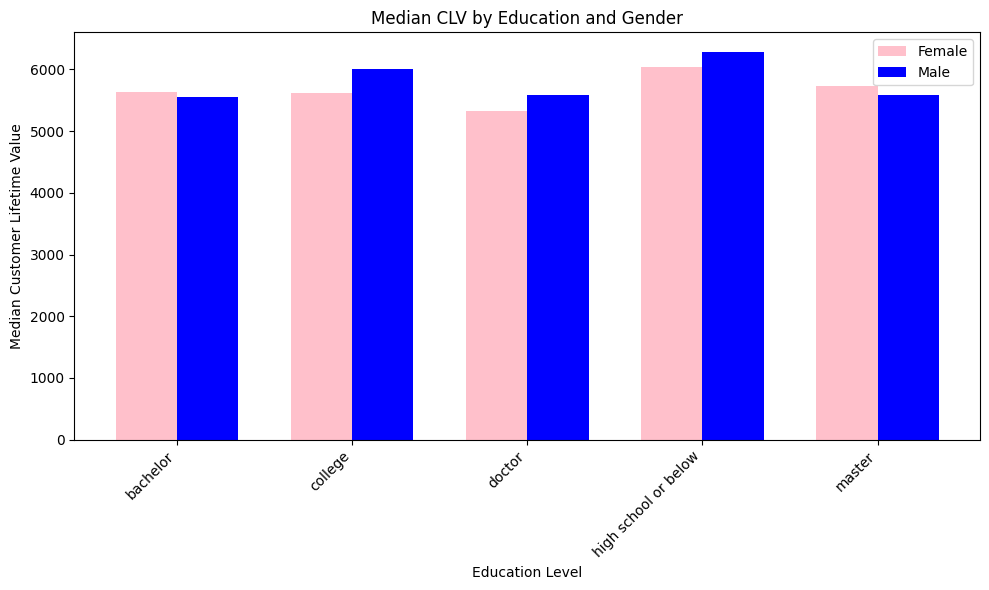

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for grouped bar chart
education_levels = clv_stats['education'].unique()
x = np.arange(len(education_levels))  # label locations
width = 0.35  # width of the bars

# Get median CLV for each gender
median_f = clv_stats[clv_stats['gender'] == 'f'].set_index('education').loc[education_levels, 'median_clv']
median_m = clv_stats[clv_stats['gender'] == 'm'].set_index('education').loc[education_levels, 'median_clv']

# Create the plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, median_f, width, label='Female', color='pink')
ax.bar(x + width/2, median_m, width, label='Male', color='blue')

# Labels and title
ax.set_xlabel('Education Level')
ax.set_ylabel('Median Customer Lifetime Value')
ax.set_title('Median CLV by Education and Gender')
ax.set_xticks(x)
ax.set_xticklabels(education_levels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()



In [46]:
# Aanalyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

# Extract month from effective_to_date
df_marketing['month'] = df_marketing['effective_to_date'].dt.month_name()

# Create a pivot table counting policies by state (as rows) and month (as col)
policy_counts = pd.pivot_table(
    df_marketing,
    index='state',    # rows
    columns='month',  # col
    values='policy',  # values to aggregate
    aggfunc='count',  # count policies
    fill_value=0      # fill missing with 0
)
print("Number of Policies Sold by State and Month:")
print(policy_counts)

Number of Policies Sold by State and Month:
month       February  January
state                        
arizona          929     1008
california      1634     1918
nevada           442      551
oregon          1344     1565
washington       425      463


In [ ]:
# Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

# *Hint:*
# - *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. 
#  Afterwards, you will need to sort the data by the count of policies sold in descending order.*
# - *Next, you will select the top 3 states with the highest number of policies sold.*
# - *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*






In [64]:
# Group by state and month, count policies
df_grouped = df_marketing.groupby(["state", "month"], as_index=False).agg(policies_sold = ("policy", "count"))
df_grouped.head(20)

,state,month,policies_sold
0,arizona,February,929
1,arizona,January,1008
2,california,February,1634
3,california,January,1918
4,nevada,February,442
5,nevada,January,551
6,oregon,February,1344
7,oregon,January,1565
8,washington,February,425
9,washington,January,463


In [65]:
# Find top 3 states by total policies sold
top_states = df_grouped.groupby("state")["policies_sold"].sum().nlargest(3).index
print(top_states)

Index(['california', 'oregon', 'arizona'], dtype='string', name='state')


In [69]:
# Filter grouped data for top 3 states
top_filtered = df_grouped[df_grouped["state"].isin(top_states)]

# Create pivot table: states by months
top_pivot = top_filtered.pivot_table(index = "state", columns = "month", values = "policies_sold", fill_value = 0)
print(top_pivot)


month       February  January
state                        
arizona       929.00 1,008.00
california  1,634.00 1,918.00
oregon      1,344.00 1,565.00
